<a href="https://colab.research.google.com/github/girivad/ml-phases-of-matter-ext/blob/main/Machine_Learning_Phase_Transitions_Implementation_2.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import random

# **Data Generation**

In [10]:
#Generate random grids of 1s and -1s, making sure they are unbalanced. Then calculate the energy of the current state. 
#Then pick a random particle in the lattice, and flip its sign. When you flip the spin, you have to calculate the energy of this new state again. 
#If it is less than the current energy, switch curr state to new state. If greater, apply the probability e^-(beta)(Ev-E_mu) = e^-(beta)(J)(summation of the product between the 
#flipped particle and its neighbors).
#Sample for many different temps
def get_energy(lattice):
  en = 0
  #Brute Neighbor Addition
  for i in range(len(lattice)):
    for j in range(len(lattice)):
      if i>0:
        en -= lattice[i][j]*lattice[i-1][j]
      if i<len(lattice)-1:
        en -= lattice[i][j]*lattice[i+1][j]
      if j>0:
        en -= lattice[i][j]*lattice[i][j-1]
      if j<len(lattice)-1:
        en -= lattice[i][j] * lattice[i][j+1]
  return en

grid_size = 32 #The grid size.
starts = 10 #For each temperature. 10
samples = 100 #The number of samples per start per temperature. 100
temp_range = np.arange(1,3.7,0.1)
therm_steps = 100
k = (1.38064852)/(10**23)
#b = 0.7 #This is our beta*J value. b = 1/kT
for temp in temp_range:
  b = 1/(k*temp)
  for start in range(starts):
    for sample in range(samples):
      start_lat = np.array([[np.random.exponential() for a in range(grid_size)] for b in range(grid_size)])
      lattice = np.zeros((grid_size,grid_size))
      lattice[start_lat>=0.4] = 1.0
      lattice[start_lat<0.4] = -1.0
      assert list(lattice.flatten()).count(1.)/(grid_size**2) > 0.5 #To ensure largely unbalanced  
      sampleList = []
      enList = []
      timeList = []
      time = 0  
      for therm_step in range(therm_steps):
        curr_en = get_energy(lattice)
        flip_x,flip_y = (random.randint(0,grid_size-1),random.randint(0,grid_size-1))
        state_v = lattice.copy()
        state_v[flip_x][flip_y] *=-1
        v_en = get_energy(state_v)
        p_uv = 1 if v_en<curr_en else np.exp(-b*(v_en - curr_en))
        timeList.append(time)
        time += 1
        if np.random.random()<p_uv:
          lattice = state_v.copy()
        enList.append(get_energy(lattice))
      sampleList.append(lattice)
sampleList[0]

array([[-1., -1.,  1., ...,  1.,  1.,  1.],
       [-1., -1., -1., ...,  1.,  1.,  1.],
       [-1., -1., -1., ..., -1., -1.,  1.],
       ...,
       [ 1.,  1., -1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [-1.,  1.,  1., ...,  1.,  1.,  1.]])

99

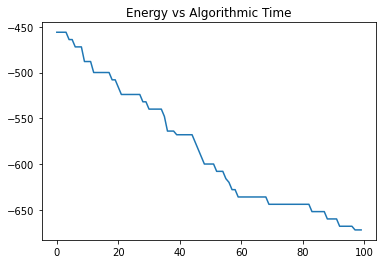

In [11]:
import matplotlib.pyplot as plt
plt.plot(timeList,enList)
plt.title("Energy vs Algorithmic Time")
timeList[-1]